# Центральная предельная теорема

Рассмотрим случайную величину X с функцией распределения F(x). Пусть имеется ее выборка объема n:
    $$ X \sim F(X) $$
    $$ X^n = (X_1, X_2, ..., X_n) $$
    $$ {\overline X_n} = \frac{1}{n}\sum_{i=1}^n X_i $$
    $$ X^n \approx\sim N\left(EX,\frac{DX}{n}\right)$$
То есть распределение выборочных средних достаточно хорошо описывается нормальным распределением. С ростом n точность нормальной аппроксимации увеличивается.

## Непрерывные распределения. Экспоненциальное распределение

$$ f(x)=\lambda e ^ {-\lambda x} $$
Математическое ожидание: $ \lambda ^ {-1} $

Дисперсия: $ \lambda ^ {-2} $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

In [15]:
# зададим теоретическую случайную величину, распределенную по экспоненциальному закону с параметром лямбда
mylambda=2
exp_rv = sts.expon(scale = 1 / mylambda)

# зададим 1000 случайных значений, подчиненных экспоненциальному закону
sample = exp_rv.rvs(1000)

Text(0.5, 0, '$x$')

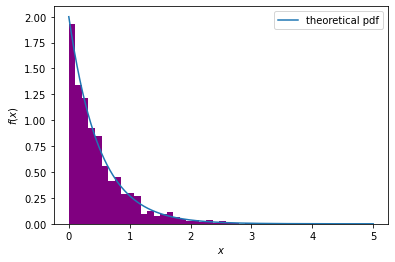

In [16]:
x = np.linspace(0,5,1000)
pdf = exp_rv.pdf(x) # плотность теоретической величины
plt.hist(sample, bins = 'auto', color='purple', density = True) # гистограмма по 1000 полученным случайным значениям
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [17]:
# функция 1000 раз генерирует выборку объема n, подчиненную экспоненциальному закону, вычисляет среднее значение, 
# и добавляет его в  list_x
def sample_expon(n):
    list_x = []
    for i in range(1000):
        list_n=exp_rv.rvs(n)
        list_x.append(round(np.mean(list_n),3))
    return list_x

# функция формирования гистограммы выборки и графика плотности соответствующего нормального распределения с параметрами:
# среднее экспоненциального распределения равняется его параметру в степени -1
# дисперсия равняется параметру в степени -2
def graph_sample_theory(list_x, n):
#   гистограмма выборки
    x = np.linspace(0,4,1000)
    plt.hist(list_x,bins = 'auto', color='purple', density = True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
#   график плотности теоретического распределения
    norm_rv = sts.norm(mylambda**(-1), (mylambda**(-2)/n) ** (0.5))
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='normal pdf', alpha=0.5)
    plt.legend()
    plt.ylabel('$f(x)$') 
    plt.xlabel('$x$')
    plt.show()


Объем выборки:  5 


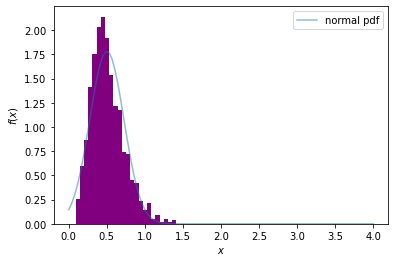

Объем выборки:  10 


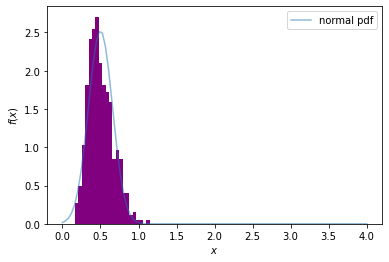

Объем выборки:  50 


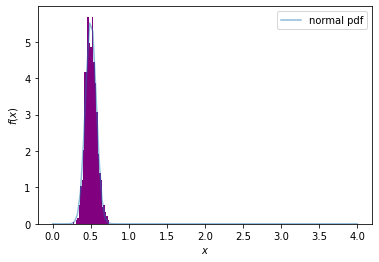

In [18]:
# определим объем выборок:
choice = (5,10,50)
for n in (choice):
    for i in range(1):
        list_x = sample_expon(n)
        print ('\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m')
        graph_sample_theory(list_x, n)


Выборочное среднее действительно, с увеличением выборки приближается к математическому ожиданию нормального распределения В целом, наблюдается большая концентрация величин вокруг значения выборочного среднего, а следовательно, действительно, при увеличении объема выборок, распределение выборочных средних становится все ближе и ближе к нормальному

## Дискретные распределения. Распределение Пуассона.

$$ p(k)=P(Y=k)=\frac {\lambda ^ k} {k!} e ^ {-\lambda} $$

Математическое ожидание: $ \lambda $

Дисперсия: $ \lambda $

In [6]:
# зададим теоретическую случайную величину, распределенную по закону Пуассона с параметром лямбда
mylambda=3
pois_rv = np.random.poisson(size=2000, lam = mylambda)

Text(0.5, 0, '$x$')

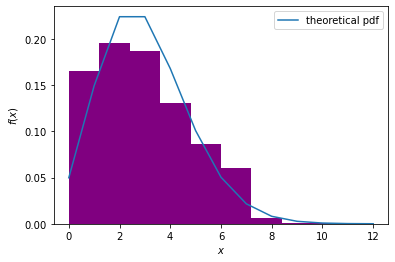

In [7]:
x = np.arange(0,13)
pdd = sts.poisson.pmf(x, mylambda) #масса вероятности теоретической величины
plt.hist(pois_rv, color='purple', density = True) #гистограмма по 1000 полученным случайным значениям
plt.plot(x, pdd, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [8]:
# функция 1000 раз генерирует выборку объема n, подчиненную закону Пуассона, вычисляет среднее значение, 
# и добавляет его в  list_x
def sample_poisson(n, mylambda):
    list_x = []
    for i in range(1000):
        list_n=np.random.poisson(size=n, lam = mylambda )
        list_x.append(round(np.mean(list_n),3))
    return list_x

# функция формирования гистограммы выборки и графика плотности соответствующего нормального распределения с параметрами:
# среднее распределения Пуассона равняется его параметру лямбда
# дисперсия равняется параметру лямбда
def graph_sample_theory_poisson(list_x, n):
#   гистограмма выборки
    x = np.linspace(0,6,1000)
    plt.hist(list_x, color='purple', density = True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
#   график плотности
    norm_rv = sts.norm(mylambda, (mylambda / n)**0.5)
    x = np.linspace(0,6,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='normal pdf', alpha=0.5)
    plt.legend()
    plt.ylabel('$f(x)$') 
    plt.xlabel('$x$')
    plt.show()


Объем выборки:  5 


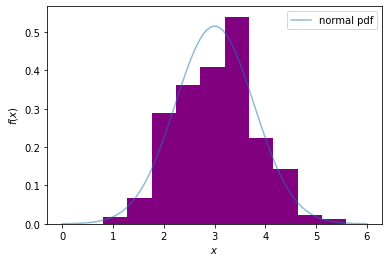

Объем выборки:  10 


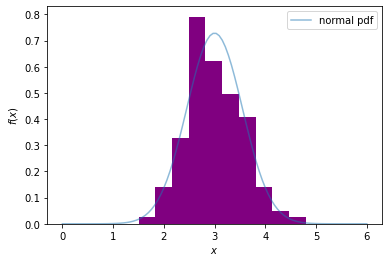

Объем выборки:  50 


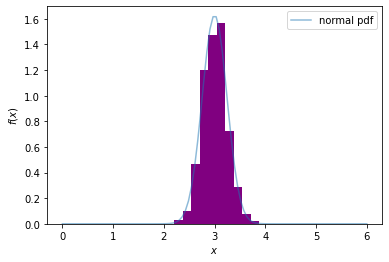

In [9]:
# определим объем выборок:
choice = (5,10,50)
for n in (choice):
    for i in range(1):
        list_x = sample_poisson(n, mylambda)
        print ('\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m')
        graph_sample_theory_poisson(list_x, n)

Для дискретных случайных величин центральная предельная теорема также верна. С ростом объема выборок как угодно распределенной случайной величины их средние распределены асимптотически нормально.

### Дополнительное задание (самостоятельно)

Провести исследование любого выбранного случайного распределения.